In [2]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [3]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [21]:
#Part 1
dfLE= dfLE.dropna(axis=0, inplace=False)
dfLE["GDP_per_Capita"] = dfLE["GDP"] / dfLE["Population"]
dfLE[["Country","GDP_per_Capita"]].sample(10)


,Country,GDP_per_Capita
48,Djibouti,947.134899
98,Luxembourg,52725.125099
101,Malaysia,4117.493318
159,Spain,19240.569641
111,Montenegro,4922.207098
42,Cyprus,13697.060587
174,Tunisia,2942.049453
138,Romania,4826.392553
102,Maldives,8020.146375
39,CostaRica,3428.897125


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [20]:
dfLE.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250,414.824126
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750,1674.441147
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,7.345597e+10,2.164983e+07,12.71250,3392.912329
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375,2146.263722
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,1.641579e+11,2.012120e+07,16.50625,8158.454561


In [6]:
#Print all distributions
def bigGraph(df_in, columnName, hist_rnd, pmf_rnd):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data, hist_rnd)) # some of the values have large exponents, rounding them are plotted better on the graph, therefore creating better visuals
    pmf = thinkstats2.Pmf(round(data, pmf_rnd))    # same for pmf, it can better be visualized when values are rounded off
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data)

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title = "Histogram")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title = "PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title = "CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title = "Normal Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title = "Log Normal Plot")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title = "PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return

Life Expectancy Graphs

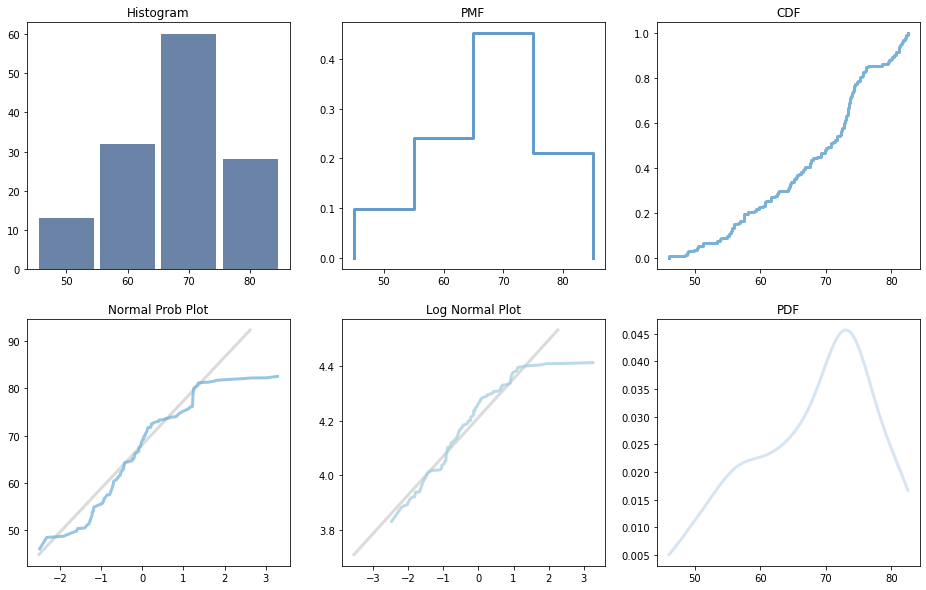

In [62]:
bigGraph(dfLE, "Lifeexpectancy", -1, -1)

Adult Mortality Graphs

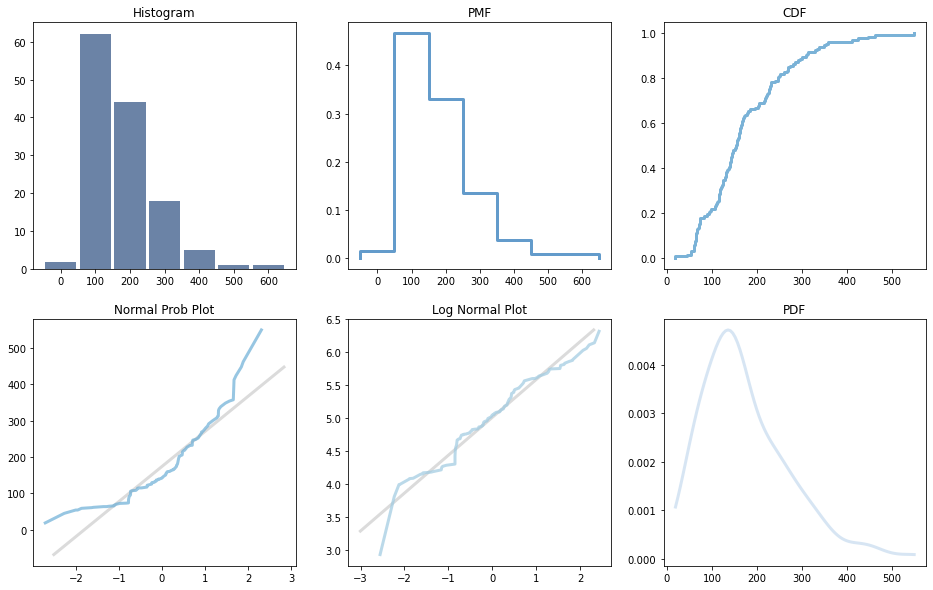

In [67]:
bigGraph(dfLE, "AdultMortality", -2, -2)

Infant Deaths Graphs

c:\Users\rod\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\rod\Desktop\STATS Git Repositories\BSIP_Assignment_2_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


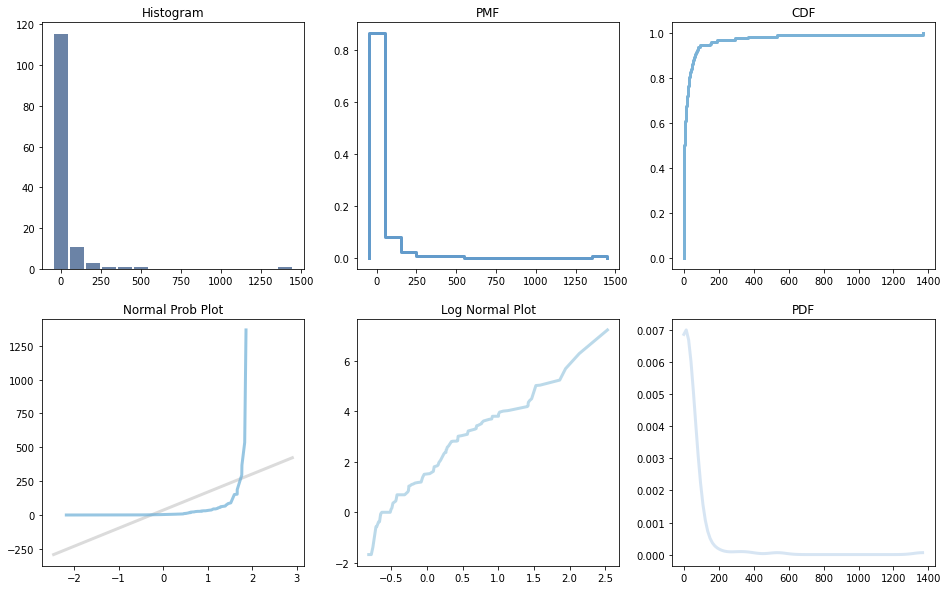

In [71]:
bigGraph(dfLE, "infantdeaths", -2, -2)

BMI Graphs

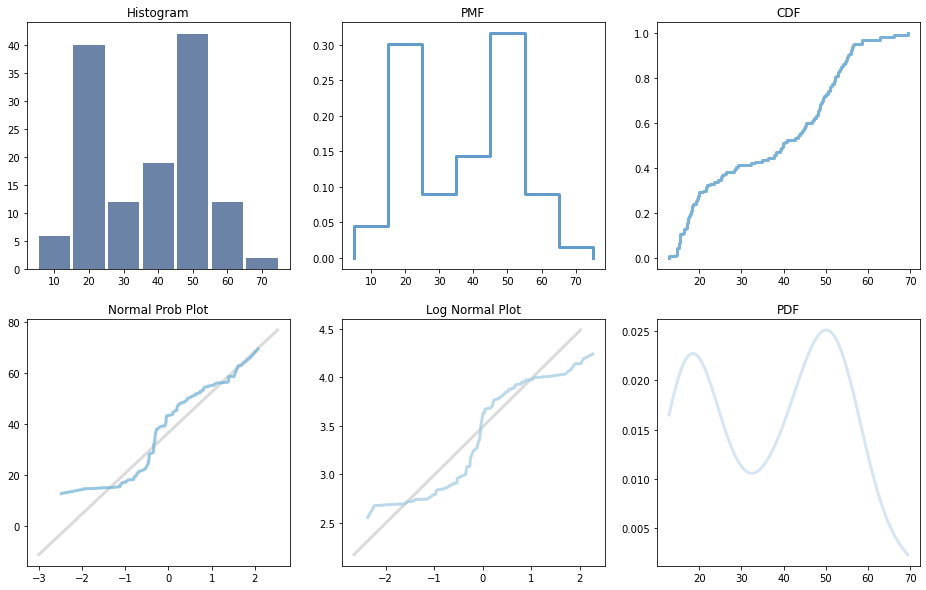

In [72]:
bigGraph(dfLE, "BMI", -1, -1)

GDP Graphs

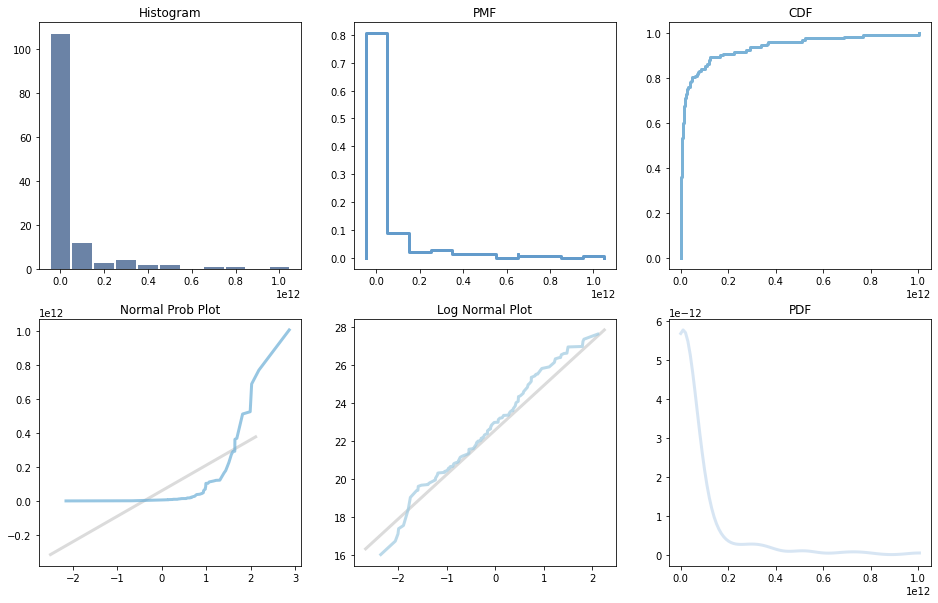

In [74]:
bigGraph(dfLE, "GDP", -11, -11)

Population Graphs

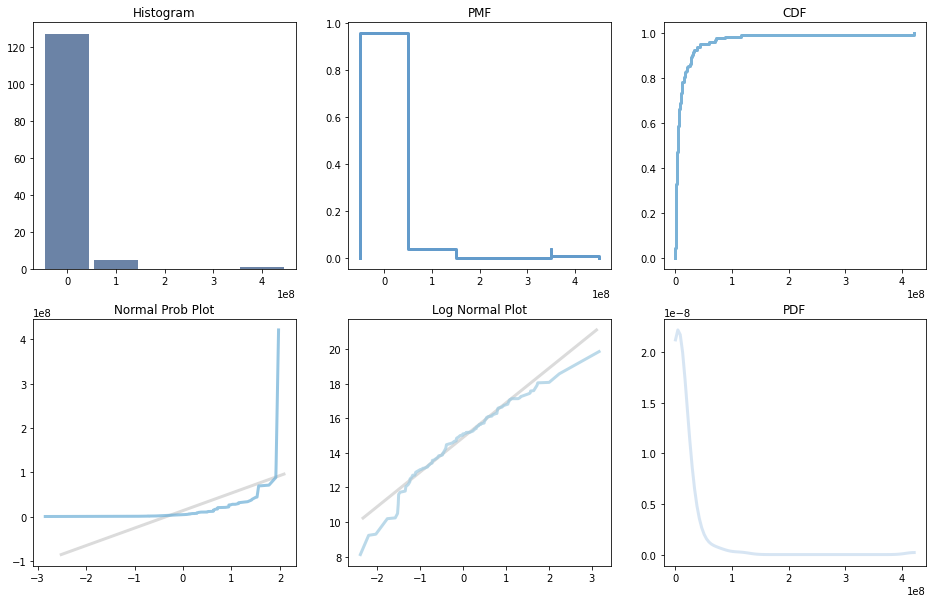

In [141]:
bigGraph(dfLE, "Population", -8, -8)

Schooling Graphs

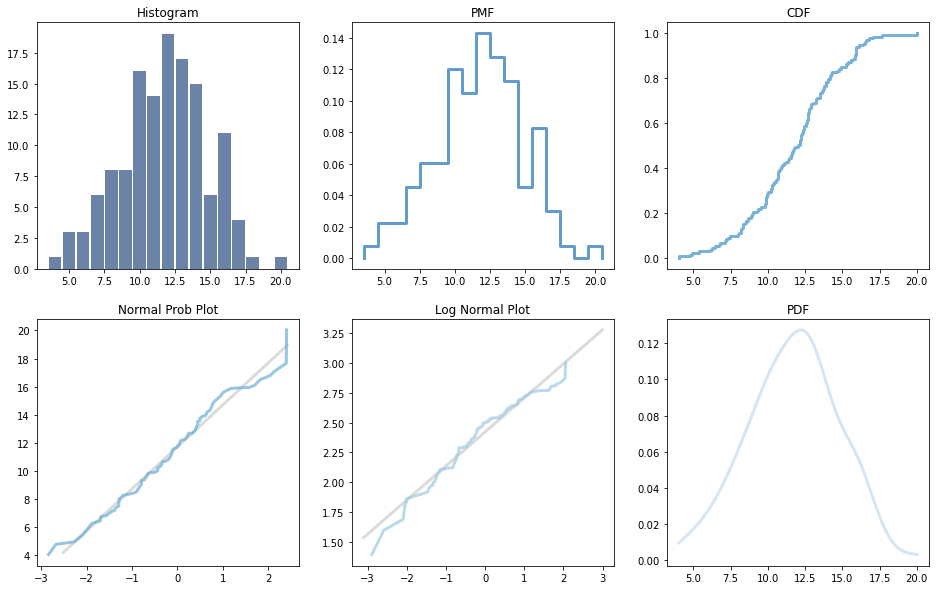

In [76]:
bigGraph(dfLE, "Schooling", 0, 0)

GDP per Capita Graphs

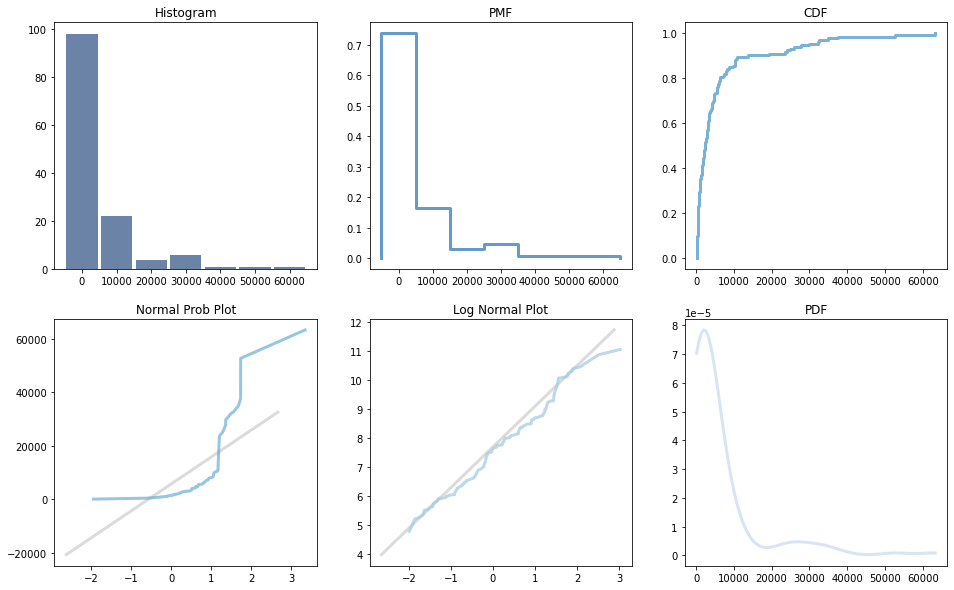

In [23]:
bigGraph(dfLE, "GDP_per_Capita", -4, -4)

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

For this section, we refer to the SCHOOLING graphs in Part 1. The distribution seems to follow a "normal distribution" based on the normal probability plot. We can make an analytical distribution using the following:

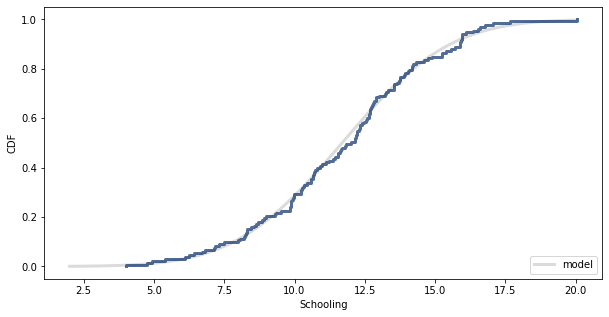

In [146]:
school_mu = dfLE["Schooling"].mean()
school_sigma = dfLE["Schooling"].std()
schooling_cdf = thinkstats2.Cdf(dfLE["Schooling"])
xs, ps = thinkstats2.RenderNormalCdf(school_mu, school_sigma, low=2, high=20)
thinkplot.Plot(xs, ps, label='model', color='0.8')
thinkplot.Cdf(schooling_cdf) 
thinkplot.Config(xlabel='Schooling', ylabel='CDF', loc='lower right')

Our empirical data seem to fall along the line of our analytical distribution.

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

For this section, we refer to the GDP per Capita graphs in Part 1. The distribution seems to follow a "log normal distribution" based on the log normal probability plot. We can make an analytical distribution using the following:

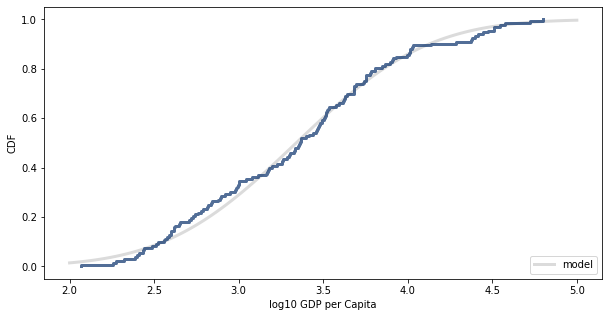

In [147]:
#Analytical for GDP/capita
log_GDP = np.log10(dfLE["GDP_per_Capita"])
log_GDP_cdf = thinkstats2.Cdf(log_GDP)
log_mu, log_sigma = log_GDP.mean(), log_GDP.std()
xs, ps = thinkstats2.RenderNormalCdf(log_mu, log_sigma, low=2, high=5)
thinkplot.Plot(xs, ps, label='model', color='0.8')
thinkplot.Cdf(log_GDP_cdf) 
thinkplot.Config(xlabel='log10 GDP per Capita', ylabel='CDF', loc='lower right')

Our empirical data seem to fall along the line of our analytical distribution.

The GDP per Capita calculated seem to be accurate. Looking at the 2021 GDP per Capita list in wikipedia, Ireland, Austria, Netherlands, Luxembourg and Australia are still among the countries with very high GDP per Capita. While Burundi, Eritrea, Guinea and Liberia still have low GDP per Capita. (https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita)

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [131]:
#Visualize correlations.
from itertools import groupby


df_dev = dfLE[dfLE["isDeveloped"] == True]
df_dev = df_dev.drop(columns={"isDeveloped"})
df_notdev = dfLE[dfLE["isDeveloped"] == False]
df_notdev = df_notdev.drop(columns={"isDeveloped"}) 


In [105]:
df_dev.describe()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,1.900000e+01,1.900000e+01,19.000000,19.000000
mean,78.906579,83.154605,0.766447,10.372737,85.547054,400.759868,53.154605,0.953947,94.029605,94.167763,1.912192e+11,8.552836e+06,15.659868,21708.826804
std,3.445816,33.870864,0.991028,1.823666,13.130103,648.380881,4.705711,1.177377,4.281205,4.251126,2.763415e+11,1.097830e+07,1.646198,16848.735021
min,72.806250,54.125000,0.000000,6.926667,48.200000,1.125000,43.631250,0.000000,86.000000,86.125000,2.315607e+09,2.247424e+05,13.518750,4820.882331
25%,75.884375,61.187500,0.000000,8.916333,80.800481,11.093750,51.100000,0.000000,91.843750,91.937500,1.316536e+10,1.167168e+06,14.115625,10252.944148
50%,80.362500,67.562500,0.187500,10.260667,91.812500,77.250000,53.162500,0.375000,95.500000,95.000000,4.443344e+10,4.587010e+06,15.868750,13697.060587
75%,81.328125,98.281250,1.312500,12.066667,93.950000,350.906250,55.181250,1.625000,96.781250,97.156250,2.582423e+11,9.491025e+06,16.478125,32432.418168
max,82.518750,161.812500,2.812500,12.654000,97.375000,1961.375000,66.181250,3.250000,98.312500,98.937500,1.004677e+12,3.875735e+07,20.037500,63337.610450


In [96]:
import warnings
warnings.filterwarnings('ignore')

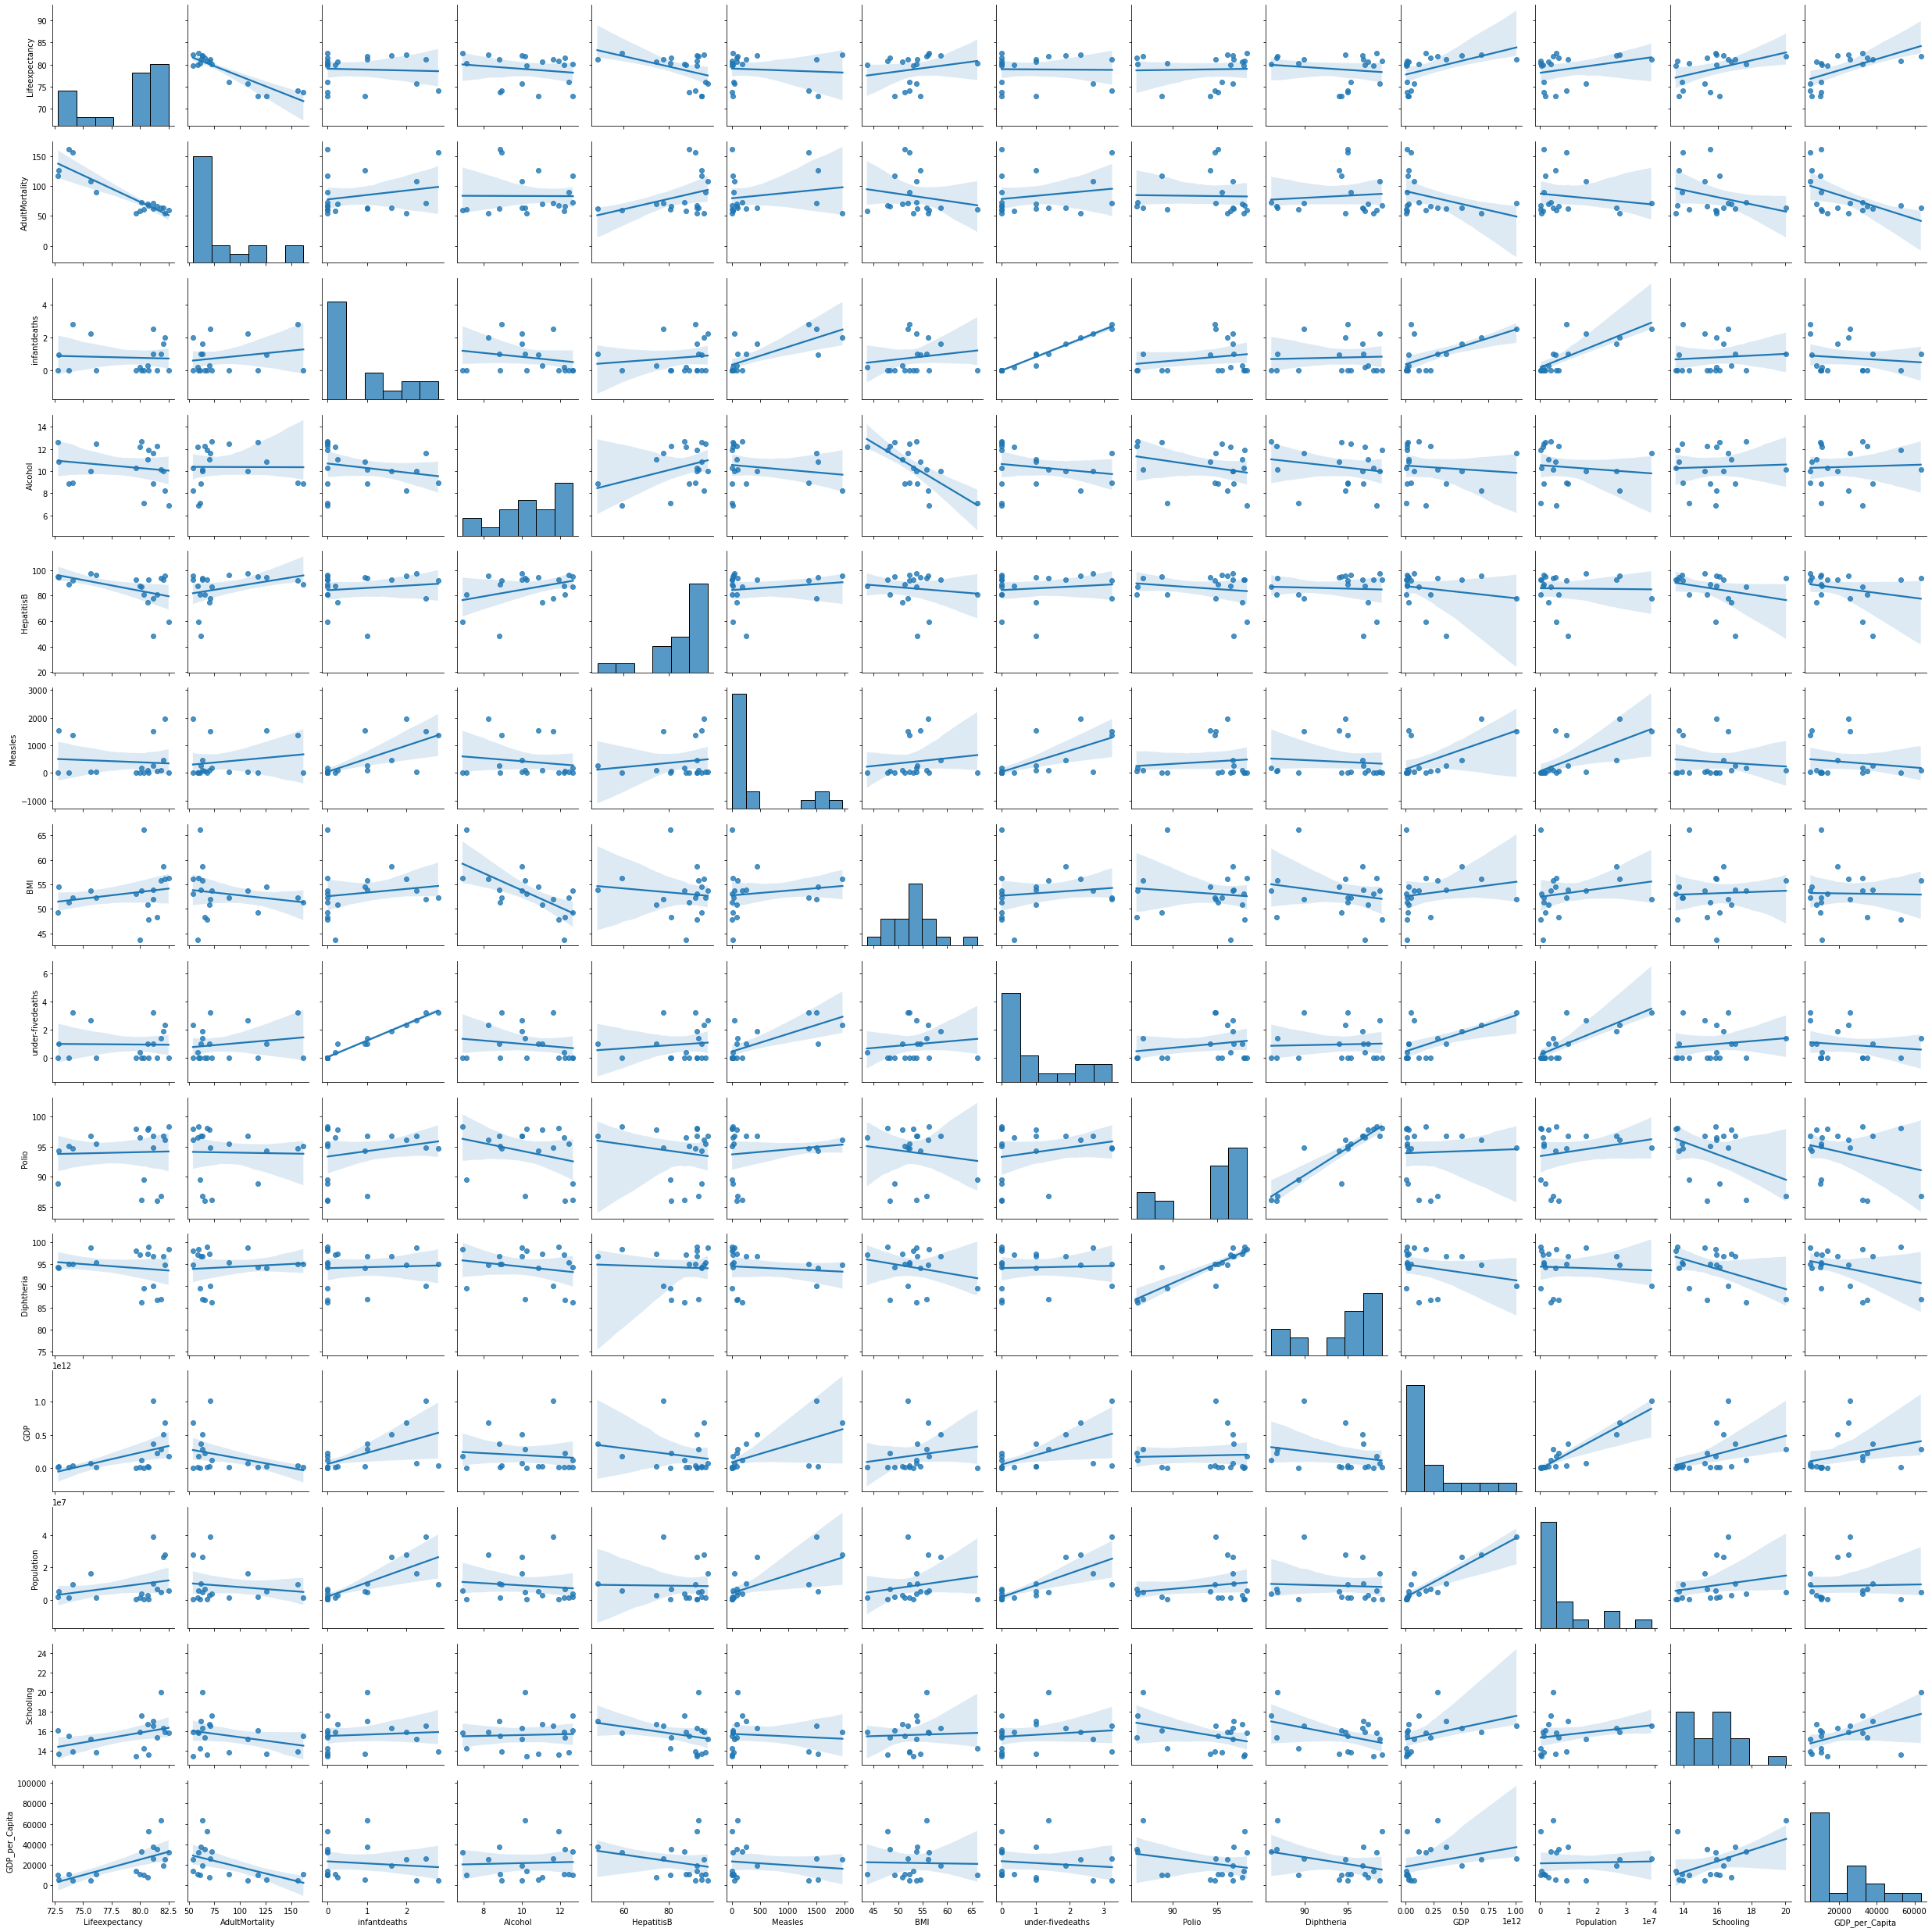

In [106]:
sns.pairplot(df_dev, kind ="reg")
plt.show()

In [115]:
df_notdev.describe()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,1.140000e+02,1.140000e+02,114.000000,114.000000
mean,66.345230,189.491228,41.758772,3.447585,75.892895,3033.584978,33.948191,57.961075,78.329073,78.455279,3.840179e+10,1.420864e+07,11.030482,3184.848222
std,8.683777,95.883140,143.792455,2.978389,17.426400,9099.947377,15.532877,194.875441,15.832870,16.641079,1.048731e+11,4.265763e+07,2.652966,4952.761659
min,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,12.875000,0.000000,32.875000,26.812500,8.988098e+06,3.334250e+03,4.018750,117.466394
25%,59.451563,126.109375,1.031250,0.844833,65.189904,20.781250,18.268750,1.109375,67.843750,69.578125,9.355045e+08,9.231946e+05,9.376563,578.245499
50%,67.737500,162.875000,6.500000,2.698333,78.031250,295.437500,33.959375,8.062500,78.843750,80.875000,3.939110e+09,3.728776e+06,11.281250,1812.949632
75%,73.400000,238.812500,28.734375,5.517000,88.753125,2359.156250,48.509375,40.421875,91.671875,92.328125,1.703791e+10,1.133322e+07,12.703125,3419.900926
max,82.218750,550.062500,1366.687500,13.497333,98.875000,65857.937500,69.431250,1812.500000,98.562500,98.500000,7.683560e+11,4.214677e+08,16.506250,29785.859548


For the not develeped data set, there seems to be a huge difference between the 75th percentile and the max values for the GDP per capita. We can filter this data set further and look for the outliers.

In [139]:
df_more20 = df_notdev[df_notdev["GDP_per_Capita"] > 20000]
df_more20.head()

,Country,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
30,Canada,81.68750,64.625,2.0000,8.053333,28.846154,129.5000,55.86250,2.0000,85.3125,91.0625,3.384881e+11,1.136405e+07,15.8750,29785.859548
60,France,82.21875,73.125,2.9375,12.404667,51.250000,2661.6250,51.98125,3.4375,98.2500,98.0625,7.683560e+11,2.758173e+07,15.9000,27857.422247
66,Greece,81.21875,73.625,0.1875,8.803333,88.937500,24.8750,58.68125,0.4375,91.4375,96.6250,3.735905e+10,1.550208e+06,15.9375,24099.375234
81,Israel,81.30000,59.500,0.9375,2.497333,97.437500,138.9375,54.98750,1.0000,94.2500,89.0000,6.559575e+08,2.786288e+04,15.7125,23542.348201


There are only 4 countries with GDP per capita more than 20000. There maybe an error classifying these countries as not developed. We can then exclude them in our not developed data set.

In [138]:
df_less20 = df_notdev[df_notdev["GDP_per_Capita"] < 20000]
df_less20.head()

,Country,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250,414.824126
1,Albania,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750,1674.441147
2,Algeria,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,7.345597e+10,2.164983e+07,12.71250,3392.912329
3,Angola,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375,2146.263722
5,Argentina,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,1.641579e+11,2.012120e+07,16.50625,8158.454561


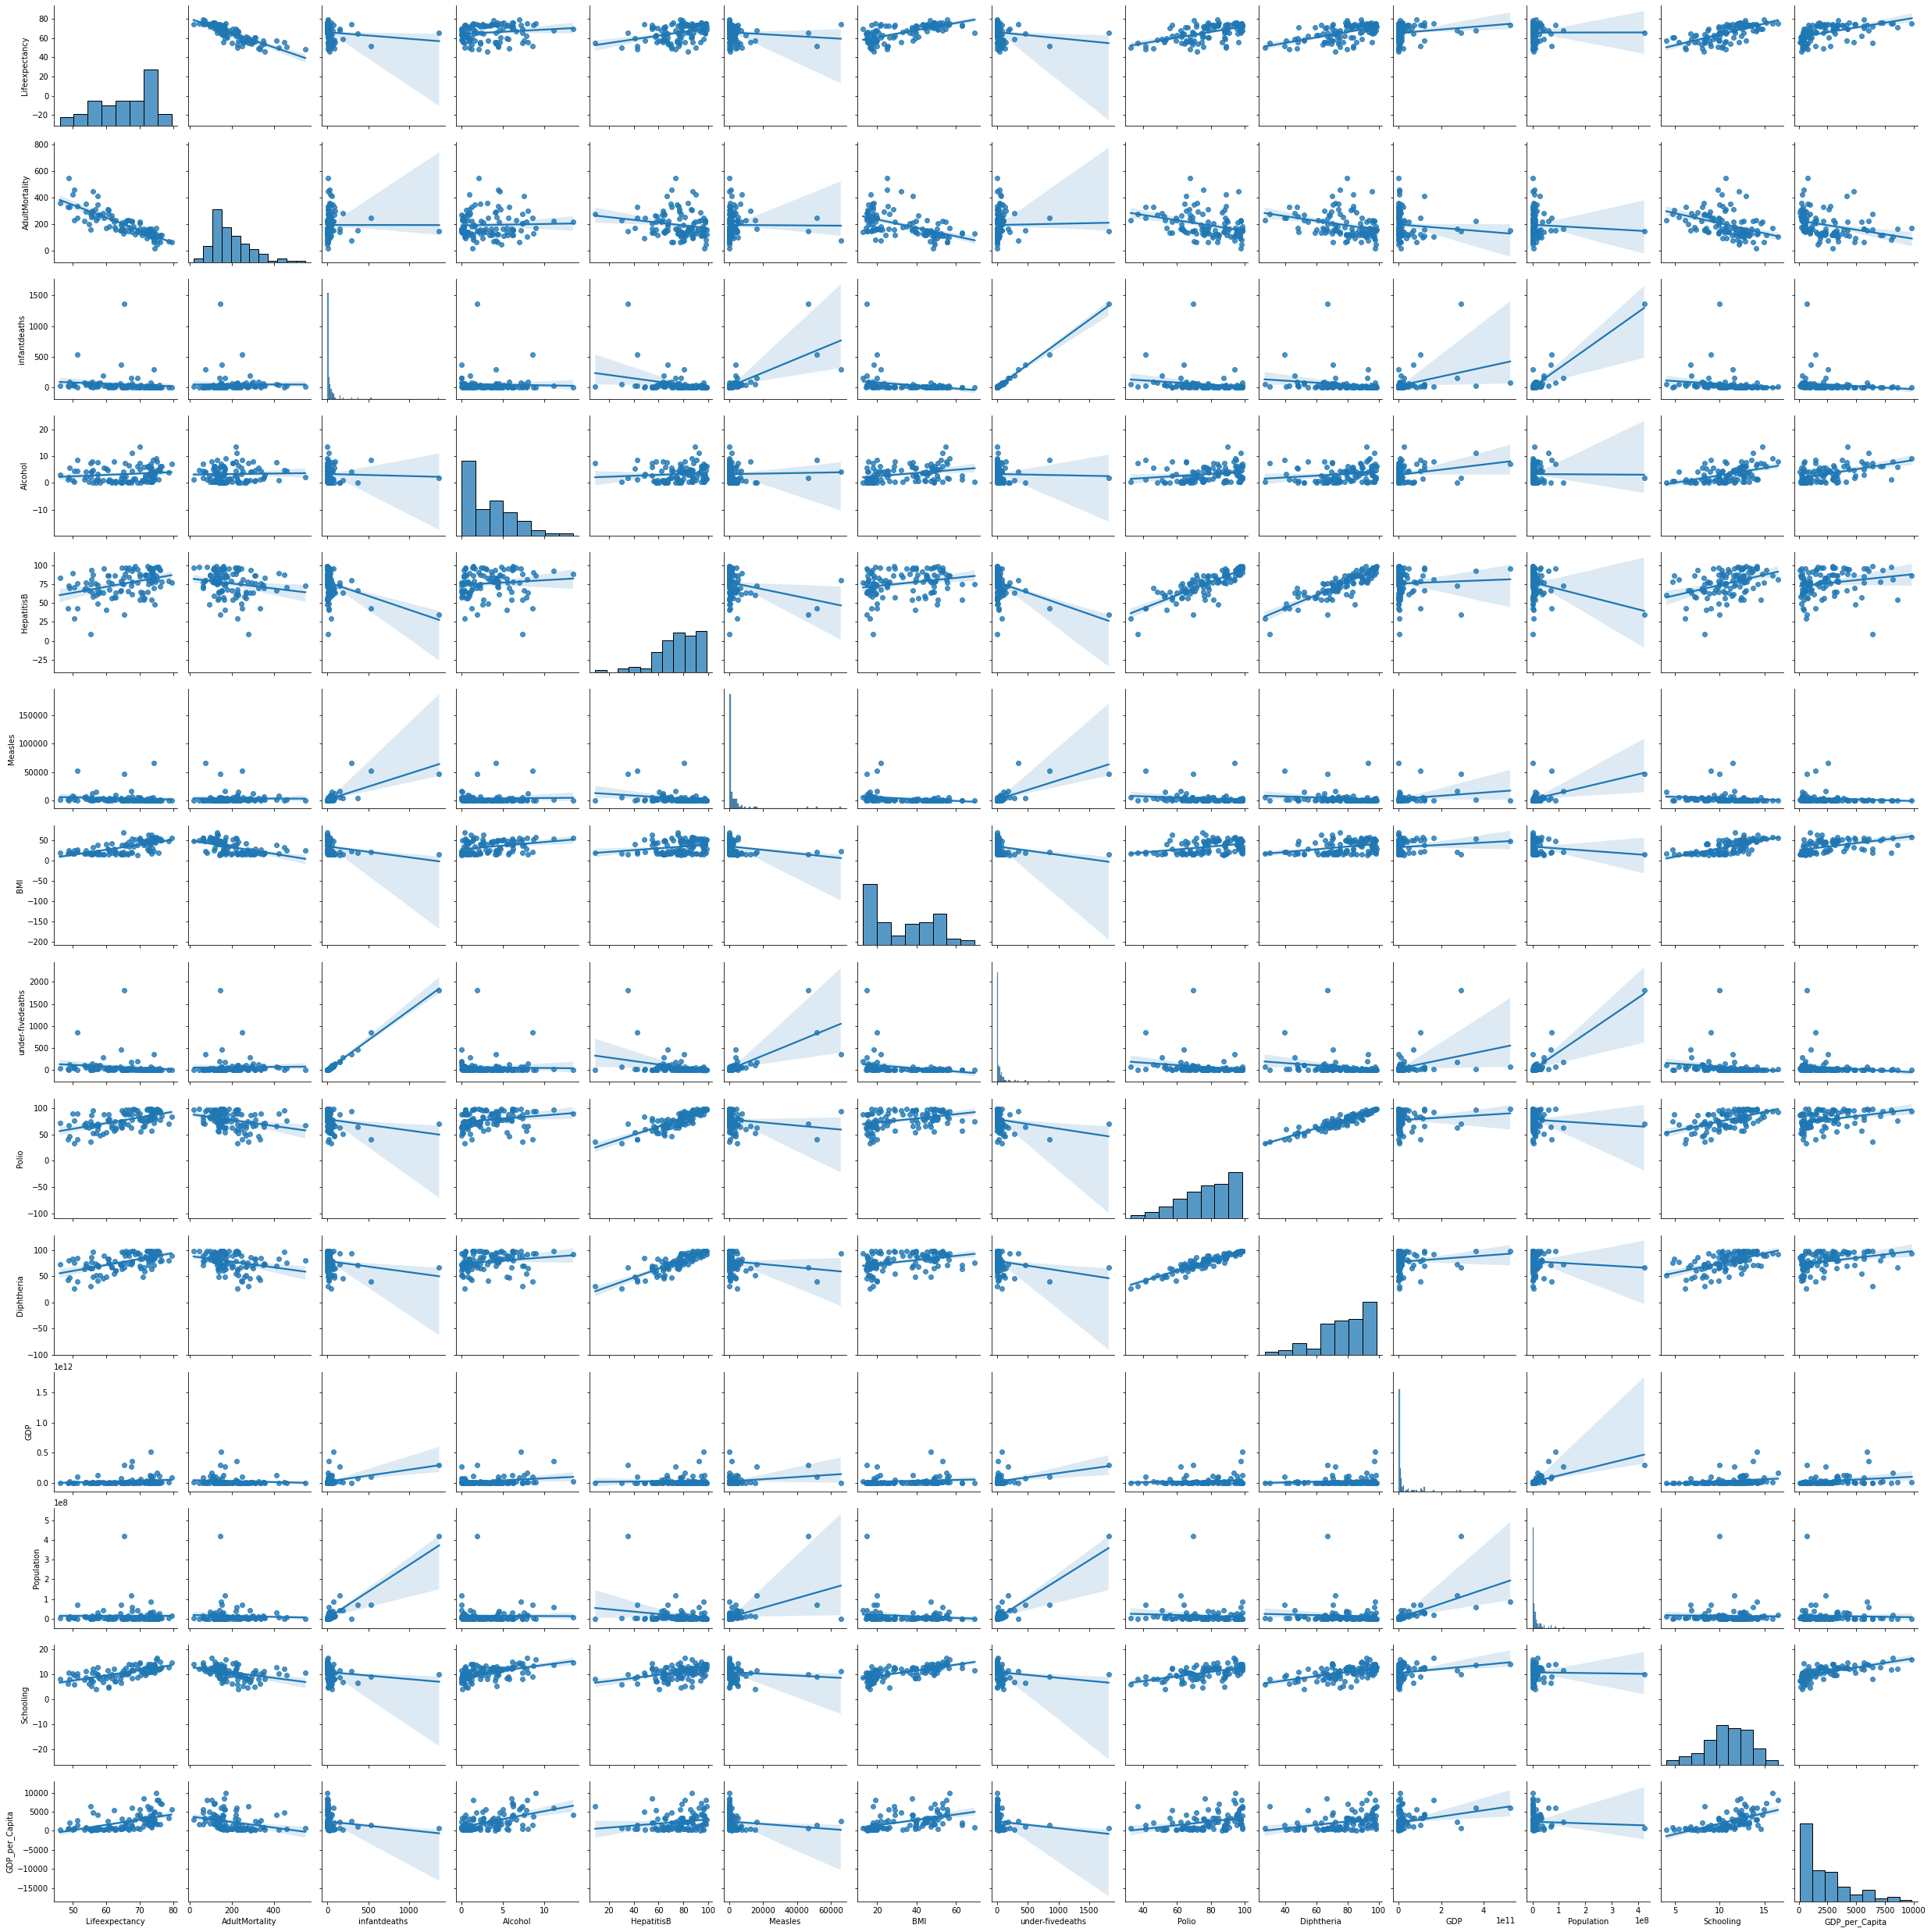

In [133]:
sns.pairplot(df_less20, kind ="reg")
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

Based on the pairplots generated above, the following have strong correlations:

DEVELOPED:  

A positve correlation is observed for diptheria and polio, under five deaths and infant deaths
and there seem to be a negative correlation between lifeexpectancy and adult mortality.

In [142]:
#Calculate correlations and analyze.
#Calculate some correleations
print("Diptheria-Polio Correlation:", thinkstats2.Corr(df_dev["Diphtheria"], df_dev["Polio"]), thinkstats2.SpearmanCorr(df_dev["Diphtheria"], df_dev["Polio"]))
print("Infant deaths - Under five deaths Correlation:", thinkstats2.Corr(df_dev["infantdeaths"], df_dev["under-fivedeaths"]), thinkstats2.SpearmanCorr(df_dev["infantdeaths"], df_dev["under-fivedeaths"]))
print("Life expectancy - Adult Mortality Correlation:", thinkstats2.Corr(df_dev["Lifeexpectancy"], df_dev["AdultMortality"]), thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"], df_dev["AdultMortality"]))

Diptheria-Polio Correlation: 0.9062843519495526 0.9341527655838455
Infant deaths - Under five deaths Correlation: 0.9867963975219676 0.9960687894191131
Life expectancy - Adult Mortality Correlation: -0.899359206998119 -0.6701754385964912


As for the NOT DEVELOPED countries, we can also observe the same correlations:

A positve correlation is observed for diptheria and polio, under five deaths and infant deaths
and there seem to be a negative correlation between lifeexpectancy and adult mortality.


In [143]:
print("Diptheria-Polio Correlation:", thinkstats2.Corr(df_less20["Diphtheria"], df_less20["Polio"]), thinkstats2.SpearmanCorr(df_less20["Diphtheria"], df_less20["Polio"]))
print("Infant deaths - Under five deaths Correlation:", thinkstats2.Corr(df_less20["infantdeaths"], df_less20["under-fivedeaths"]), thinkstats2.SpearmanCorr(df_less20["infantdeaths"], df_less20["under-fivedeaths"]))
print("Life expectancy - Adult Mortality Correlation:", thinkstats2.Corr(df_less20["Lifeexpectancy"], df_less20["AdultMortality"]), thinkstats2.SpearmanCorr(df_less20["Lifeexpectancy"], df_less20["AdultMortality"]))

Diptheria-Polio Correlation: 0.9444417992890649 0.9454456925317013
Infant deaths - Under five deaths Correlation: 0.9968817173554656 0.9976293745085698
Life expectancy - Adult Mortality Correlation: -0.8463725658662922 -0.8796308610813198


With regards to life expectancy, developed countries seem to have no correlation with polio and diphtheria, while they seem to be correlated in not developed countries.

We can calculate the correlations for each.

For the DEVELOPED countries, we can see that there is no correlation between Life expectancy and polio, while there is a negative correlation between diphtheria and life expectancy.

In [145]:
print("Life expectancy - Polio:", thinkstats2.Corr(df_dev["Lifeexpectancy"], df_dev["Polio"]), thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"], df_dev["Polio"]))
print("Life expectancy - Diphtheria:", thinkstats2.Corr(df_dev["Lifeexpectancy"], df_dev["Diphtheria"]), thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"], df_dev["Diphtheria"]))

Life expectancy - Polio: 0.03449852320843414 0.2316805839532434
Life expectancy - Diphtheria: -0.15831187543966305 -0.007898201725678752


As opposed to the NOT DEVELOPED countries, Diphtheria and Polio are showing some positive correlation to life expectancy.

In [144]:
print("Life expectancy - Polio:", thinkstats2.Corr(df_less20["Lifeexpectancy"], df_less20["Polio"]), thinkstats2.SpearmanCorr(df_less20["Lifeexpectancy"], df_less20["Polio"]))
print("Life expectancy - Diptheria:", thinkstats2.Corr(df_less20["Lifeexpectancy"], df_less20["Diphtheria"]), thinkstats2.SpearmanCorr(df_less20["Lifeexpectancy"], df_less20["Diphtheria"]))

Life expectancy - Polio: 0.5697537583458804 0.5518419000635485
Life expectancy - Diptheria: 0.5711941476653729 0.5548680286814466


My theory why this seem to be the case is that maybe vaccination rate against these diseases in developed countries is higher than that of the not developed countries.

The following links show the worldwide immunization over time against these 2 diseases.

https://ourworldindata.org/vaccination#diphtheria-tetanus-and-pertussis-vaccine

https://ourworldindata.org/vaccination#polio-vaccine

We can see that vaccination rates in most of the not developed countries are trailing far behind the developed countries.